MS FINAL PROJECT: TissueMNIST IMAGE DATA CLASSIFICATION USING RESNET-18 DL MODEL

Name: Anil Vallepu

course: MS in Data Science at TAMUCC,TX, USA.


In [1]:
!pip install torch torchvision matplotlib medmnist

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, models
from medmnist import INFO, Evaluator
from medmnist.dataset import TissueMNIST
import matplotlib.pyplot as plt


In [3]:
from medmnist import INFO
from medmnist.dataset import TissueMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

# TissueMNIST information
dataset_info = INFO["tissuemnist"]
n_classes = dataset_info["n_channels"]  # Correctly access the number of classes

# Data transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize based on TissueMNIST data
])

# Load datasets
train_dataset = TissueMNIST(split="train", transform=transform, download=True)
val_dataset = TissueMNIST(split="val", transform=transform, download=True)
test_dataset = TissueMNIST(split="test", transform=transform, download=True)

# Data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Print dataset information
print(f"Number of classes: {n_classes}")
print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Test samples: {len(test_dataset)}")


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Number of classes: 1
Training samples: 165466
Validation samples: 23640
Test samples: 47280


Test-1

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader

# Define the class labels
LABELS = {
    0: "glomerular",
    1: "blood vessel",
    2: "interstitium",
    3: "artery",
    4: "vein",
    5: "tubule",
    6: "medulla",
    7: "collecting duct"
}

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset and Transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data
])

# Load TissueMNIST Dataset
from medmnist import INFO
from medmnist.dataset import TissueMNIST

# Download and load TissueMNIST
info = INFO['tissuemnist']
DataClass = TissueMNIST

train_data = DataClass(split='train', transform=transform, download=True)
test_data = DataClass(split='test', transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define ResNet-18 Model
class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet18Classifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Instantiate the model
model = ResNet18Classifier(num_classes=len(LABELS)).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device) 
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

# Evaluating the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate_model(model, test_loader)


def classify_image(model, data, index):
    model.eval()
    image, _ = data[index]
    image = image.unsqueeze(0).to(device)  
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return LABELS[predicted.item()]

# Classifying an image 
image_index = 0  
classification = classify_image(model, test_data, image_index)
print(f"Image {image_index} classified as: {classification}")


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1/10, Loss: 1.2531
Epoch 2/10, Loss: 1.1074
Epoch 3/10, Loss: 1.0253
Epoch 4/10, Loss: 0.9769
Epoch 5/10, Loss: 0.9375
Epoch 6/10, Loss: 0.9042
Epoch 7/10, Loss: 0.8780
Epoch 8/10, Loss: 0.8312
Epoch 9/10, Loss: 0.7907
Epoch 10/10, Loss: 0.7457
Test Accuracy: 61.90%
Image 0 classified as: medulla


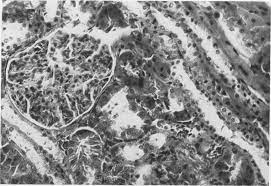

Problem: If the kidney tissue is medulla, it often leading to complications like "kidney stones, urinary tract infections, and blood in the urine (hematuria)"

Test-2

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader

# Define the class labels
LABELS = {
    0: "glomerular",
    1: "blood vessel",
    2: "interstitium",
    3: "artery",
    4: "vein",
    5: "tubule",
    6: "medulla",
    7: "collecting duct"
}

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset and Transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data
])

# Load TissueMNIST Dataset
from medmnist import INFO
from medmnist.dataset import TissueMNIST

info = INFO['tissuemnist']
DataClass = TissueMNIST

train_data = DataClass(split='train', transform=transform, download=True)
test_data = DataClass(split='test', transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define ResNet-18 Model
class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet18Classifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 128),  
            nn.ReLU(),  # ReLU Activation
            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        return self.resnet(x)

# Instantiate the model
model = ResNet18Classifier(num_classes=len(LABELS)).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

# Evaluating the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate_model(model, test_loader)

# Classify a single image
def classify_image(model, data, index):
    model.eval()
    image, _ = data[index]
    image = image.unsqueeze(0).to(device)  
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return LABELS[predicted.item()]

# Classify an image
image_index = 5  
classification = classify_image(model, test_data, image_index)
print(f"Image {image_index} classified as: {classification}")


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1/10, Loss: 1.2152
Epoch 2/10, Loss: 1.0736
Epoch 3/10, Loss: 1.0251
Epoch 4/10, Loss: 1.0363
Epoch 5/10, Loss: 0.9882
Epoch 6/10, Loss: 0.9549
Epoch 7/10, Loss: 0.9733
Epoch 8/10, Loss: 0.9968
Epoch 9/10, Loss: 0.9313
Epoch 10/10, Loss: 0.9242
Test Accuracy: 62.00%
Image 5 classified as: collecting duct


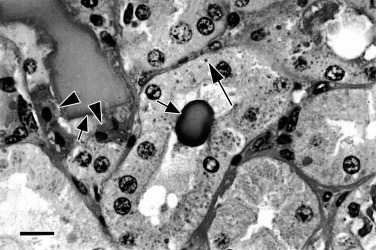

Problem: Collecting duct carcinoma (CDC) is a rare and aggressive form of kidney cancer that begins in the collecting duct of the kidney.

Test-3

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader

# Define the class labels
LABELS = {
    0: "glomerular",
    1: "blood vessel",
    2: "interstitium",
    3: "artery",
    4: "vein",
    5: "tubule",
    6: "medulla",
    7: "collecting duct"
}

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset and Transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data
])

# Load TissueMNIST Dataset
from medmnist import INFO
from medmnist.dataset import TissueMNIST


info = INFO['tissuemnist']
DataClass = TissueMNIST

train_data = DataClass(split='train', transform=transform, download=True)
test_data = DataClass(split='test', transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define ResNet-18 Model
class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet18Classifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 128),  
            nn.ReLU(),  # ReLU Activation
            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        return self.resnet(x)

# Instantiate the model
model = ResNet18Classifier(num_classes=len(LABELS)).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

# Evaluating the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate_model(model, test_loader)

def classify_image(model, data, index):
    model.eval()
    image, _ = data[index]
    image = image.unsqueeze(0).to(device)  
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return LABELS[predicted.item()]

# Here I am Classifying an image
image_index = 99  
classification = classify_image(model, test_data, image_index)
print(f"Image {image_index} classified as: {classification}")


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1/10, Loss: 1.2122
Epoch 2/10, Loss: 1.0748
Epoch 3/10, Loss: 1.0137
Epoch 4/10, Loss: 0.9933
Epoch 5/10, Loss: 1.0210
Epoch 6/10, Loss: 0.9683
Epoch 7/10, Loss: 0.9367
Epoch 8/10, Loss: 0.9462
Epoch 9/10, Loss: 0.9344
Epoch 10/10, Loss: 0.9542
Test Accuracy: 60.46%
Image 99 classified as: glomerular


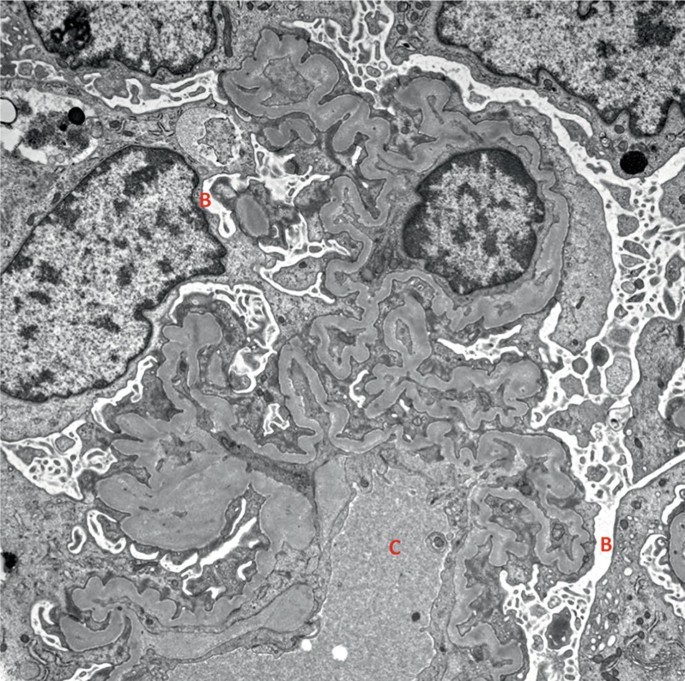

Problem: Glomerular disease may be caused by an infection or a drug that is harmful to your kidneys. In other cases, it may be caused by a disease that affects the entire body, like diabetes or lupus.

Test-4

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader

# Define the class labels
LABELS = {
    0: "glomerular",
    1: "blood vessel",
    2: "interstitium",
    3: "artery",
    4: "vein",
    5: "tubule",
    6: "medulla",
    7: "collecting duct"
}

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset and Transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data
])

# Load TissueMNIST Dataset
from medmnist import INFO
from medmnist.dataset import TissueMNIST

# Download and load TissueMNIST
info = INFO['tissuemnist']
DataClass = TissueMNIST

train_data = DataClass(split='train', transform=transform, download=True)
test_data = DataClass(split='test', transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define ResNet-18 Model
class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet18Classifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 128),  # Add intermediate fully connected layer
            nn.ReLU(),  # ReLU Activation
            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        return self.resnet(x)

# Instantiate the model
model = ResNet18Classifier(num_classes=len(LABELS)).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
def train_model(model, train_loader, criterion, optimizer, epochs=10):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer)

# Evaluating the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate_model(model, test_loader)


def classify_image(model, data, index):
    model.eval()
    image, _ = data[index]
    image = image.unsqueeze(0).to(device)  
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return LABELS[predicted.item()]

# # Here I am Classifying image based on index
image_index = 999  
classification = classify_image(model, test_data, image_index)
print(f"Image {image_index} classified as: {classification}")

Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1/10, Loss: 1.2146
Epoch 2/10, Loss: 1.0724
Epoch 3/10, Loss: 1.0586
Epoch 4/10, Loss: 1.0069
Epoch 5/10, Loss: 1.0580
Epoch 6/10, Loss: 1.1022
Epoch 7/10, Loss: 1.0908
Epoch 8/10, Loss: 1.0776
Epoch 9/10, Loss: 1.0393
Epoch 10/10, Loss: 1.0638
Test Accuracy: 53.88%
Image 999 classified as: glomerular


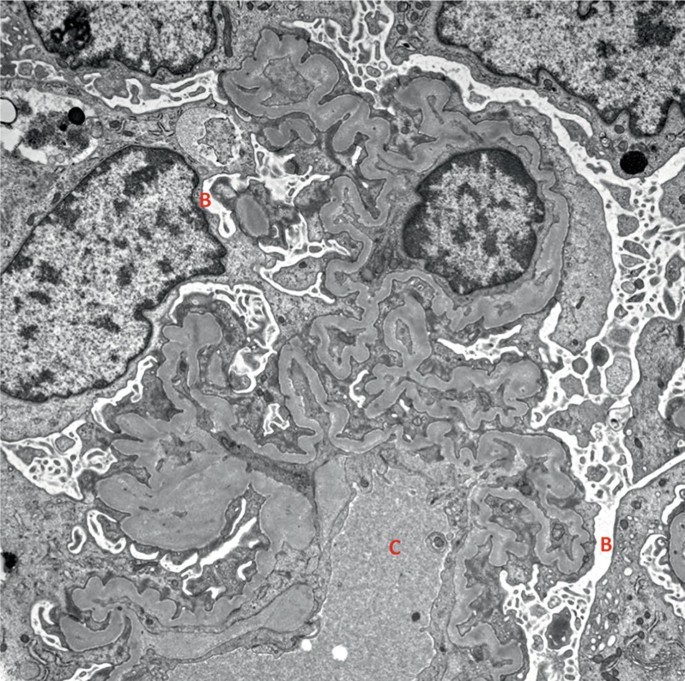

Problem: Glomerular disease may be caused by an infection or a drug that is harmful to your kidneys. In other cases, it may be caused by a disease that affects the entire body, like diabetes or lupus.

Test-5

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, models
from torch.utils.data import DataLoader

# Define the class labels
LABELS = {
    0: "glomerular",
    1: "blood vessel",
    2: "interstitium",
    3: "artery",
    4: "vein",
    5: "tubule",
    6: "medulla",
    7: "collecting duct"
}

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Dataset and Transformations
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to 3 channels for ResNet
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data
])

# Load TissueMNIST Dataset
from medmnist import INFO
from medmnist.dataset import TissueMNIST


info = INFO['tissuemnist']
DataClass = TissueMNIST

train_data = DataClass(split='train', transform=transform, download=True)
test_data = DataClass(split='test', transform=transform, download=True)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Define ResNet-18 Model
class ResNet18Classifier(nn.Module):
    def __init__(self, num_classes=8):
        super(ResNet18Classifier, self).__init__()
        self.resnet = models.resnet18(pretrained=True)
        self.resnet.fc = nn.Sequential(
            nn.Linear(self.resnet.fc.in_features, 128),  # Add intermediate fully connected layer
            nn.ReLU(),  # ReLU Activation
            nn.Linear(128, num_classes)  # Output layer
        )

    def forward(self, x):
        return self.resnet(x)

# Instantiate the model
model = ResNet18Classifier(num_classes=len(LABELS)).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

train_model(model, train_loader, criterion, optimizer, epochs=50)

# Evaluating the model
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.squeeze().to(device)  
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate_model(model, test_loader)


def classify_image(model, data, index):
    model.eval()
    image, _ = data[index]
    image = image.unsqueeze(0).to(device)  
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)
    return LABELS[predicted.item()]

# Here I am Classifying image based on index
image_index = 1999  
classification = classify_image(model, test_data, image_index)
print(f"Image {image_index} classified as: {classification}")


Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Using downloaded and verified file: /Users/anilvallepu/.medmnist/tissuemnist.npz
Epoch 1/50, Loss: 1.2209
Epoch 2/50, Loss: 1.0823
Epoch 3/50, Loss: 1.0370
Epoch 4/50, Loss: 1.0168
Epoch 5/50, Loss: 1.0095
Epoch 6/50, Loss: 0.9633
Epoch 7/50, Loss: 0.9426
Epoch 8/50, Loss: 0.9920
Epoch 9/50, Loss: 1.0681
Epoch 10/50, Loss: 0.9538
Epoch 11/50, Loss: 0.9583
Epoch 12/50, Loss: 1.0095
Epoch 13/50, Loss: 0.9869
Epoch 14/50, Loss: 0.9538
Epoch 15/50, Loss: 0.9572
Epoch 16/50, Loss: 0.9594
Epoch 17/50, Loss: 0.9902
Epoch 18/50, Loss: 0.9740
Epoch 19/50, Loss: 0.9510
Epoch 20/50, Loss: 0.9382
Epoch 21/50, Loss: 1.1065
Epoch 22/50, Loss: 0.9830
Epoch 23/50, Loss: 0.9550
Epoch 24/50, Loss: 0.9170
Epoch 25/50, Loss: 0.8657
Epoch 26/50, Loss: 0.8933
Epoch 27/50, Loss: 0.8445
Epoch 28/50, Loss: 0.8290
Epoch 29/50, Loss: 0.8047
Epoch 30/50, Loss: 0.7619
Epoch 31/50, Loss: 0.8068
Epoch 32/50, Loss: 0.8075
Epoch 33/50, Lo

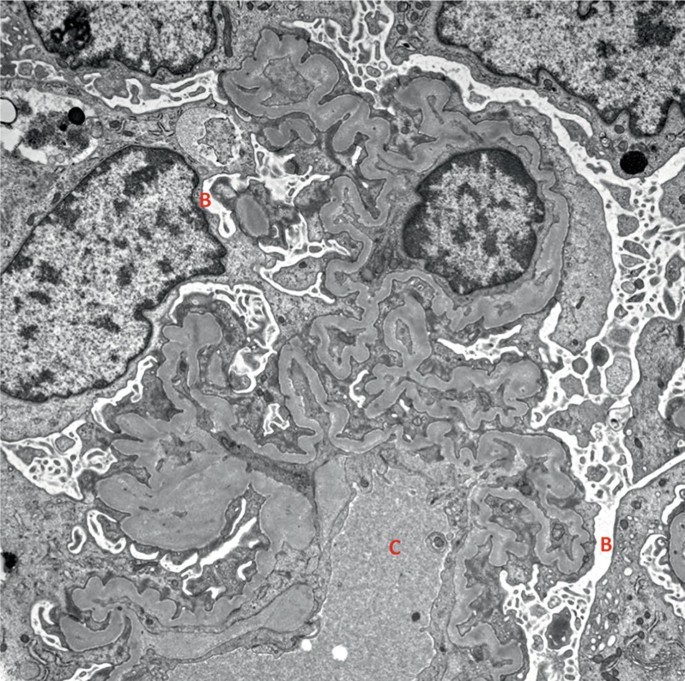

Problem: Glomerular disease may be caused by an infection or a drug that is harmful to your kidneys. In other cases, it may be caused by a disease that affects the entire body, like diabetes or lupus.

Thanks to,

Dr. Pal

Dr.M

Dr. Sreelekha 